<a href="https://colab.research.google.com/github/jcdumlao14/CloudcreditsTechnologies-Data-Science-Internship/blob/main/Project_3_Customer_Churn_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 3: Customer Churn Predictor**



## **📝 Description:**
- *Develop a model to predict whether a customer will stop using a service based on historical data. Use classification techniques and feature engineering to improve model accuracy. Visualize the key factors contributing to churn.*


## **🔧 Project Structure:**

1. **🧠 Define the Problem:** Understand the objective and type of problem (classification, regression, etc.).
2. **🗂️ Collect and Prepare Data:** Obtain the dataset, handle missing values, and preprocess data.
3. **📊 Exploratory Data Analysis (EDA):** Visualize data to understand patterns and correlations.
4. **📐 Feature Engineering:** Select and create relevant features.
5. **🔀 Split the Data:** Divide the dataset into training and testing sets.
6. **🤖 Choose a Model:** Select a suitable machine learning algorithm.
7. **🏋️ Train the Model:** Train the model using the training set.
8. **📈 Evaluate the Model:** Use appropriate metrics to evaluate the model on the test set.
9. **🔧 Improve the Model:** Tune hyperparameters, try different algorithms, or enhance features.
10. **🚀 Deploy the Model (optional):** Create an application or API to make predictions using the trained model.




##  **🧪 I’ll experiment with:**

- Logistic Regression
- Random Forest Classifier
- Gradient Boosting Classifier
- SMOTE (for class imbalance)
- GridSearchCV (for hyperparameter tuning)
- Label Encoding & One-Hot Encoding (for categorical features)
- Visualization Tools:
  - Violin plots
  - Donut pie charts
  - KDE plots
  - Correlation heatmaps
  - Stacked bar charts

## **Data Source: [Kaggle/Logisticregression telecomCustomer churmprediction](https://www.kaggle.com/datasets/dileep070/logisticregression-telecomcustomer-churmprediction/data)**

#  **1. 🧠 Define the Problem**
- I'll trying to predict which customers are likely to leave a company (churn).
- This is a "yes or no" question: Will a customer churn (yes) or not (no)?




## **Objective:**
- Predict whether a customer  will churn(leave the service) based on their historical and service-related data.


## **Type:** Binary Classification

🔍 Why?

- Binary Classification means predicting between two classes—in this case:
  - Churned (Yes) or  Not Churned(No)

## **Import Libraries**

 - `pandas`: For working with data in tables (like spreadsheets). It's used to load the data from the CSV file and manipulate it.
 - `matplotlib.pyplot`: For creating plots and charts to visualize the data or model results.
 - `numpy`: For numerical operations (like math).
 - `sklearn` (scikit-learn): The main machine learning library. It provides tools for:
    - Splitting data into training and testing sets (`train_test_split`).
    - Scaling numerical data (`StandardScaler`).
    - Converting categorical data into a numerical format that models can understand (`OneHotEncoder`).
    - Creating data processing pipelines (`Pipeline`).
    - Building machine learning models (Logistic Regression, Random Forest, and Gradient Boosting).
    - Evaluating model performance (accuracy, precision, recall, F1-score).
    - Finding the best model settings (`GridSearchCV`).
    - Handling missing data (`SimpleImputer`).
    - `seaborn`: A library built on top of matplotlib that provides a higher-level interface for creating informative and aesthetically pleasing statistical graphics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE  # For handling class imbalance
import warnings
warnings.filterwarnings('ignore')


# **2. 🗂️Collect and Prepare Data**
- The code loads data from three separate files (churn data, customer data, internet data). It checks whether the files exist first.
- It then merges these files into a single table, using the customerID to link related information.
- After merging, it checks for any missing information in the table and fills it with the zero values for a numerical column named "TotalCharges."
- Transforms the "Churn" column to numerical form (0 and 1 instead of "Yes" and "No") so the models can handle it.
- Identifies which columns contain text (categorical) data and which contain numbers (numerical) data.
- It converts binary (two-value) text columns into numerical representations.  For all categorical column, label encoder applied.
- For non-binary categorical columns, One-hot encoding method is used.
- Removes the customerID column because it's not useful for making predictions.

In [ ]:
import zipfile
import os # accessing directory structure

# Path to the zip file
zip_path = '/content/archive-Churn.zip'

# Destination directory to extract to
extract_path = '/content/unzipped_folder'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Now list the files inside the extracted folder
print(os.listdir(extract_path))


['churn_data.csv', 'internet_data.csv', 'customer_data.csv']


## **📥 Read the CSV Files**

In [ ]:
# Collect and Prepare Data

# Set the path where the files were extracted
data_path = '/content/unzipped_folder'

# Read specific CSV files
try:
    churn_df = pd.read_csv(f'{data_path}/churn_data.csv')
    customer_df = pd.read_csv(f'{data_path}/customer_data.csv')
    internet_df = pd.read_csv(f'{data_path}/internet_data.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: Ensure the 'data_path' is correct and the CSV files exist.")
    exit()  # Stop execution if data loading fails


Data loaded successfully.


In [ ]:
# Merge the dataframes
df = pd.merge(churn_df, customer_df, on='customerID', how='inner')
df = pd.merge(df, internet_df, on='customerID', how='inner')


In [ ]:
print(f"Shape of merged dataframe: {df.shape}")
df.head().style.background_gradient(cmap='gist_rainbow')

Shape of merged dataframe: (7042, 21)


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.950000,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.700000,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


## **🧹Data Cleaning and Preprocessing**

In [ ]:
#Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
customerID,0
tenure,0
PhoneService,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,0
Churn,0
gender,0


In [ ]:
# Handle missing values in 'TotalCharges' by converting to numeric and filling with 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [ ]:
# Convert 'Churn' column to numerical (0 and 1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
print("\nData Types before preprocessing:")
df.dtypes  # Display data types before conversion



Data Types before preprocessing:


,0
customerID,object
tenure,int64
PhoneService,object
Contract,object
PaperlessBilling,object
PaymentMethod,object
MonthlyCharges,float64
TotalCharges,float64
Churn,int64
gender,object


In [ ]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: Index(['customerID', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'gender', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')
Numerical columns: Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen'], dtype='object')


In [ ]:
# Apply Label Encoding to binary categorical features
for col in categorical_cols:
    if len(df[col].unique()) == 2:
        df[col] = df[col].astype('category').cat.codes
        print(f"Label encoded binary column: {col}")


Label encoded binary column: PhoneService
Label encoded binary column: PaperlessBilling
Label encoded binary column: gender
Label encoded binary column: Partner
Label encoded binary column: Dependents


In [ ]:
# One-Hot Encode the remaining categorical features (more than 2 unique values)
df = pd.get_dummies(df, columns=[col for col in categorical_cols if len(df[col].unique()) > 2], drop_first=True)

In [ ]:
print("\nData Types after preprocessing:")
df.dtypes  # Display data types after conversion



Data Types after preprocessing:


,0
tenure,int64
PhoneService,int8
PaperlessBilling,int8
MonthlyCharges,float64
TotalCharges,float64
...,...
TechSupport_Yes,bool
StreamingTV_No internet service,bool
StreamingTV_Yes,bool
StreamingMovies_No internet service,bool


In [ ]:
df.head(5).style.background_gradient(cmap='gist_rainbow') # Display first few rows


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,customerID_0016-QLJIS,customerID_0017-DINOC,customerID_0017-IUDMW,customerID_0018-NYROU,customerID_0019-EFAEP,customerID_0019-GFNTW,customerID_0020-INWCK,customerID_0020-JDNXP,customerID_0021-IKXGC,customerID_0022-TCJCI,customerID_0023-HGHWL,customerID_0023-UYUPN,customerID_0023-XUOPT,customerID_0027-KWYKW,customerID_0030-FNXPP,customerID_0031-PVLZI,customerID_0032-PGELS,customerID_0036-IHMOT,customerID_0040-HALCW,customerID_0042-JVWOJ,customerID_0042-RLHYP,customerID_0048-LUMLS,customerID_0048-PIHNL,customerID_0052-DCKON,customerID_0052-YNYOT,customerID_0056-EPFBG,customerID_0057-QBUQH,customerID_0058-EVZWM,customerID_0060-FUALY,customerID_0064-SUDOG,customerID_0064-YIJGF,customerID_0067-DKWBL,customerID_0068-FIGTF,customerID_0071-NDAFP,customerID_0074-HDKDG,customerID_0076-LVEPS,customerID_0078-XZMHT,customerID_0080-EMYVY,customerID_0080-OROZO,customerID_0082-LDZUE,customerID_0082-OQIQY,customerID_0083-PIVIK,customerID_0089-IIQKO,customerID_0093-EXYQL,customerID_0093-XWZFY,customerID_0094-OIFMO,customerID_0096-BXERS,customerID_0096-FCPUF,customerID_0098-BOWSO,customerID_0100-DUVFC,customerID_0103-CSITQ,customerID_0104-PPXDV,customerID_0106-GHRQR,customerID_0106-UGRDO,customerID_0107-WESLM,customerID_0107-YHINA,customerID_0111-KLBQG,customerID_0112-QAWRZ,customerID_0112-QWPNC,customerID_0114-IGABW,customerID_0114-PEGZZ,customerID_0114-RSRRW,customerID_0115-TFERT,customerID_0117-LFRMW,customerID_0118-JPNOY,customerID_0121-SNYRK,customerID_0122-OAHPZ,customerID_0123-CRBRT,customerID_0125-LZQXK,customerID_0128-MKWSG,customerID_0129-KPTWJ,customerID_0129-QMPDR,customerID_0130-SXOUN,customerID_0133-BMFZO,customerID_0134-XWXCE,customerID_0135-NMXAP,customerID_0136-IFMYD,customerID_0137-OCGAB,customerID_0137-UDEUO,customerID_0139-IVFJG,customerID_0141-YEAYS,customerID_0142-GVYSN,customerID_0147-ESWWR,customerID_0148-DCDOS,customerID_0151-ONTOV,customerID_0156-FVPTA,customerID_0164-APGRB,customerID_0164-XAIRP,customerID_0168-XZKBB,customerID_0174-QRVVY,customerID_0177-PXBAT,customerID_0178-CIIKR,customerID_0178-SZBHO,customerID_0181-RITDD,customerID_0186-CAERR,customerID_0187-QSXOE,customerID_0187-WZNAB,customerID_0188-GWFLE,customerID_0191-EQUUH,customerID_0191-ZHSKZ,customerID_0193-ESZXP,customerID_0195-IESCP,customerID_0196-JTUQI,customerID_0196-VULGZ,customerID_0197-PNKNK,customerID_0201-MIBOL,customerID_0201-OAMXR,customerID_0203-HHYIJ,customerID_0206-OYVOC,customerID_0206-TBWLC,customerID_0207-MDKNV,customerID_0208-BPQEJ,customerID_0212-ISBBF,customerID_0214-JHPFW,customerID_0215-BQKGS,customerID_0218-QNVAS,customerID_0219-QAERP,customerID_0219-YTZUE,customerID_0220-EBGCE,customerID_0221-NAUXK,customerID_0221-WMXNQ,customerID_0222-CNVPT,customerID_0224-HJAPT,customerID_0224-NIJLP,customerID_0224-RLWWD,customerID_0225-ZORZP,customerID_0228-MAUWC,customerID_0229-LFJAF,customerID_0230-UBYPQ,customerID_0230-WEQUW,customerID_0231-LXVAP,customerID_0233-FTHAV,customerID_0234-TEVTT,customerID_0235-KGSLC,customerID_0236-HFWSV,customerID_0237-YFUTL,customerID_0238-WHBIQ,customerID_0239-OXEXL,customerID_0244-LGNFY,customerID_0247-SLUJI,customerID_0248-IPDFW,customerID_0248-PGHBZ,customerID_0253-ZTEOB,customerID_0254-FNMCI,customerID_0254-KCJGT,customerID_0254-WWRKD,customerID_0256-LTHVJ,customerID_0257-KXZGU,customerID_0257-ZESQC,customerID_0258-NOKBL,customerID_0259-GBZSH,customerID_0260-ZDLGK,customerID_0263-FJTQO,customerID_0264-CNITK,customerID_0265-EDXBD,customerID_0265-PSUAE,customerID_0266-CLZKZ,customerID_0266-GMEAO,customerID_0268-QKIWO,customerID_0269-XFESX,customerID_0270-THENM,customerID_0274-JKUJR,customerID_0277-BKSQP,customerID_0277-ORXQS,customerID_0278-YXOOG,customerID_0280-XJGEX,customerID_0281-CNTZX,customerID_0282-NVSJS,customerID_0285-

In [ ]:
# Drop customerID
if 'customerID' in df.columns:  # Check if the column exists before dropping
    df = df.drop('customerID', axis=1)
else:
    print("Warning: 'customerID' column not found in the dataframe.")


# **3. 📊 Exploratory Data Analysis (EDA)**
- This step involves understanding the data through visualizations and summary statistics.


In [ ]:
df.describe().style.background_gradient(cmap='gist_rainbow_r')

## **3.1. Churn Rate Distribution:**
- Shows the overall percentage of customers who churned vs. those who didn't (using a donut pie chart). Helps establish the baseline churn rate.


Churn Rate:
Churn
0    73.459245
1    26.540755
Name: proportion, dtype: float64


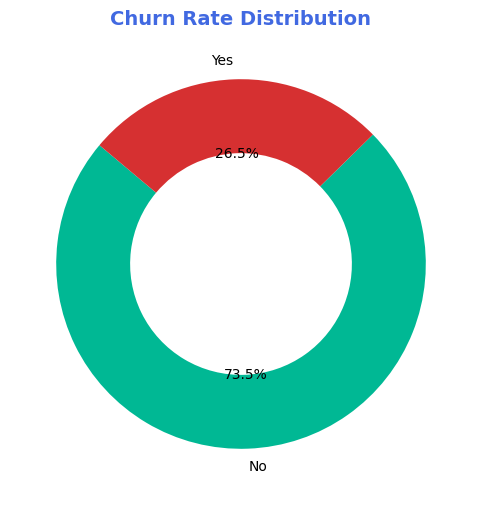

In [ ]:
# 3.1. Churn Rate Distribution
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("\nChurn Rate:")
print(churn_rate)

plt.figure(figsize=(6, 6))
colors = ['#00b894', '#d63031']
plt.pie(churn_rate, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width':0.4})
plt.title('Churn Rate Distribution', fontsize=14, fontweight='bold', color='royalblue')
plt.gca().set_facecolor('#f3eac2')
plt.show()

## **3.2. Churn by Gender:**
- Visualizes the churn rate for males vs. females (using a violin plot). Explores potential gender-related differences in churn.


Churn Rate by Gender:
Churn           0          1
gender                      
0       73.079128  26.920872
1       73.832302  26.167698


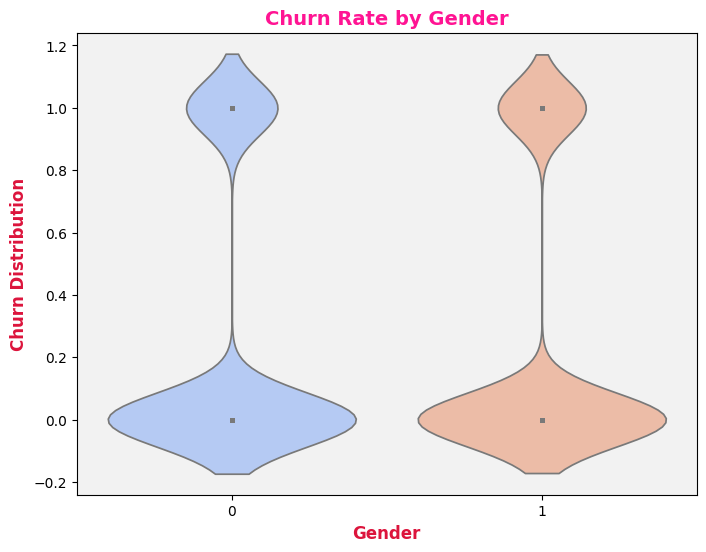

In [ ]:
# 3.2. Churn by Gender
gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by Gender:")
print(gender_churn)

melted = df[['gender', 'Churn']].copy()
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='Churn', data=melted, inner='point', palette='coolwarm')
plt.title('Churn Rate by Gender', fontsize=14, fontweight='bold', color='deeppink')
plt.xlabel('Gender', fontsize=12, fontweight='bold', color='crimson')
plt.ylabel('Churn Distribution', fontsize=12, fontweight='bold', color='crimson')
plt.gca().set_facecolor('#f2f2f2')
plt.show()

## **3.3. Churn by SeniorCitizen:**
-  Shows the churn rate for senior citizens vs. non-senior citizens (using a horizontal bar chart). Investigates the impact of age on churn.


Churn Rate by Senior Citizen:
Churn                  0          1
SeniorCitizen                      
0              76.389831  23.610169
1              58.318739  41.681261


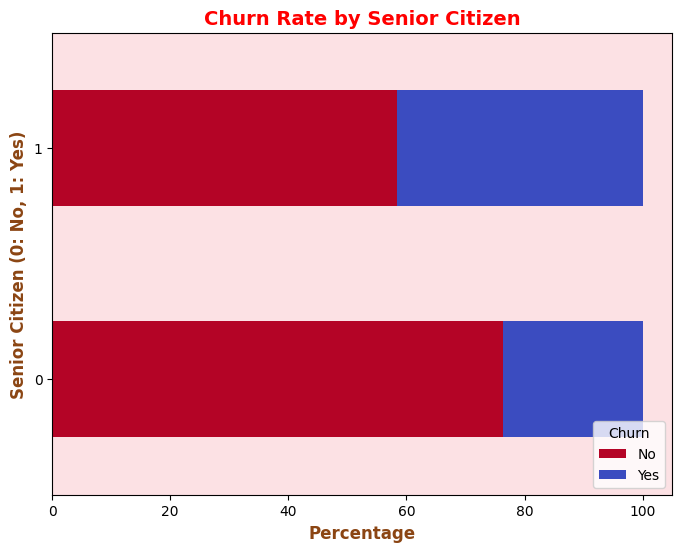

In [ ]:
# 3.3. Churn by SeniorCitizen
senior_churn = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by Senior Citizen:")
print(senior_churn)

senior_churn.plot(kind='barh', stacked=True, figsize=(8, 6), colormap='coolwarm_r')
plt.title('Churn Rate by Senior Citizen', fontsize=14, fontweight='bold', color='red')
plt.xlabel('Percentage', fontsize=12, fontweight='bold', color='saddlebrown')
plt.ylabel('Senior Citizen (0: No, 1: Yes)', fontsize=12, fontweight='bold', color='saddlebrown')
plt.legend(title='Churn', labels=['No', 'Yes'], loc='lower right')
plt.gca().set_facecolor('#fce1e4')
plt.show()


## **3.4. Churn by Partner:**
- Shows the churn rate for customers with partners or dependents vs. those without (using waffle-style stacked bar). Examines the influence of family relationships on churn.


Churn Rate by Partner:
Churn            0          1
Partner                      
0        67.032967  32.967033
1        80.335097  19.664903


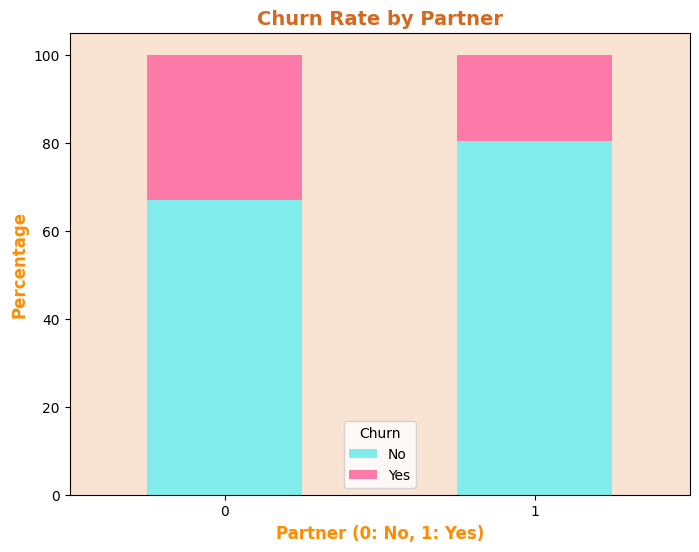

In [ ]:
# 3.4. Churn by Partner
partner_churn = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by Partner:")
print(partner_churn)

partner_churn.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#81ecec', '#fd79a8'])
plt.title('Churn Rate by Partner', fontsize=14, fontweight='bold', color='chocolate')
plt.xlabel('Partner (0: No, 1: Yes)', fontsize=12, fontweight='bold', color='darkorange')
plt.ylabel('Percentage', fontsize=12, fontweight='bold', color='darkorange')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.gca().set_facecolor('#f9e4d4')
plt.show()

## **3.5. Churn by Dependents:**
- Shows the churn rate for customers with partners or dependents
vs. those without (using outline barplot). Examines the influence of family relationships on churn.


Churn Rate by Dependents:
Churn               0          1
Dependents                      
0           68.714517  31.285483
1           84.549763  15.450237


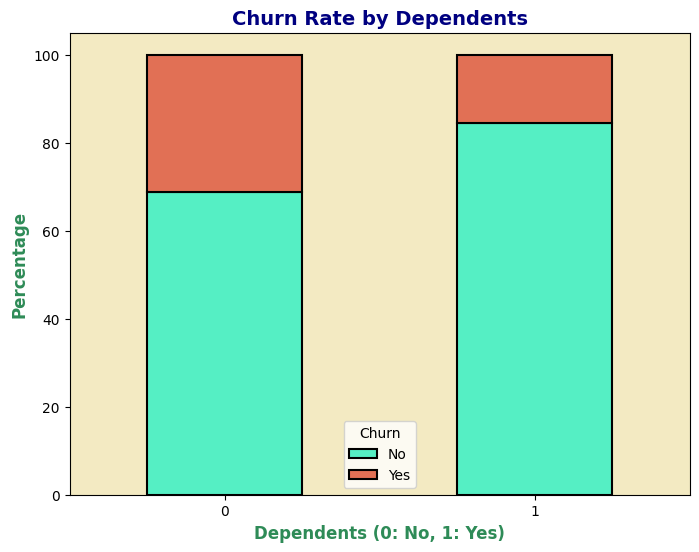

In [ ]:
# 3.5. Churn by Dependents
dependents_churn = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by Dependents:")
print(dependents_churn)

ax = dependents_churn.plot(kind='bar', stacked=True, figsize=(8, 6), edgecolor='black', linewidth=1.5, color=['#55efc4', '#e17055'])
plt.title('Churn Rate by Dependents', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Dependents (0: No, 1: Yes)', fontsize=12, fontweight='bold', color='seagreen')
plt.ylabel('Percentage', fontsize=12, fontweight='bold', color='seagreen')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.gca().set_facecolor('#f3eac2')
plt.show()


## **3.6. Churn by Contract (One Year)**
- Shows the churn rate based on different contract types one year (using stacked bars with outline charts). Analyzes the relationship between contract length and churn


Churn Rate by Contract (One Year):
Churn                      0          1
Contract_One year                      
False              69.420004  30.579996
True               88.730482  11.269518


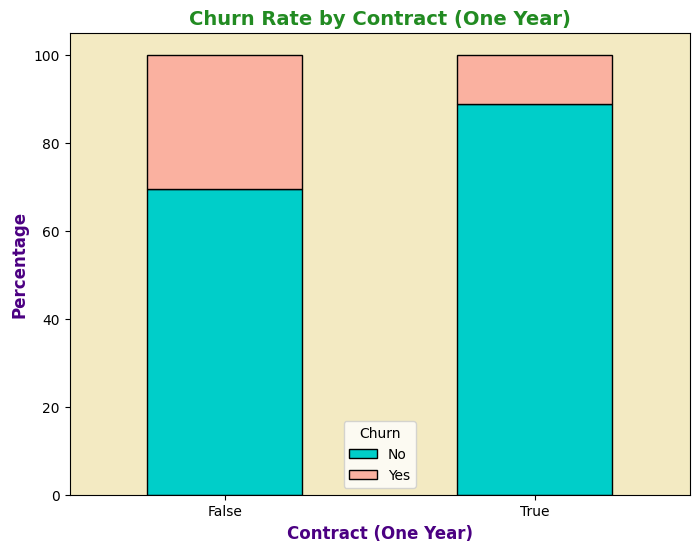

In [ ]:
# 3.6. Churn by Contract (One Year)
contract_churn = df.groupby('Contract_One year')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by Contract (One Year):")
print(contract_churn)

contract_churn.plot(kind='bar', stacked=True, figsize=(8, 6), edgecolor='black', color=['#00cec9', '#fab1a0'])
plt.title('Churn Rate by Contract (One Year)', fontsize=14, fontweight='bold', color='forestgreen')
plt.xlabel('Contract (One Year)', fontsize=12, fontweight='bold', color='indigo')
plt.ylabel('Percentage', fontsize=12, fontweight='bold', color='indigo')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.gca().set_facecolor('#f3eac2')
plt.show()

## **3.6 (continued). Churn by Contract (Two Year)**
- Shows the churn rate based on different contract types (two year) (using stacked bar charts). Analyzes the relationship between contract length and churn


Churn Rate by Contract (Two year):
Churn                      0          1
Contract_Two year                      
False              65.949888  34.050112
True               97.166470   2.833530


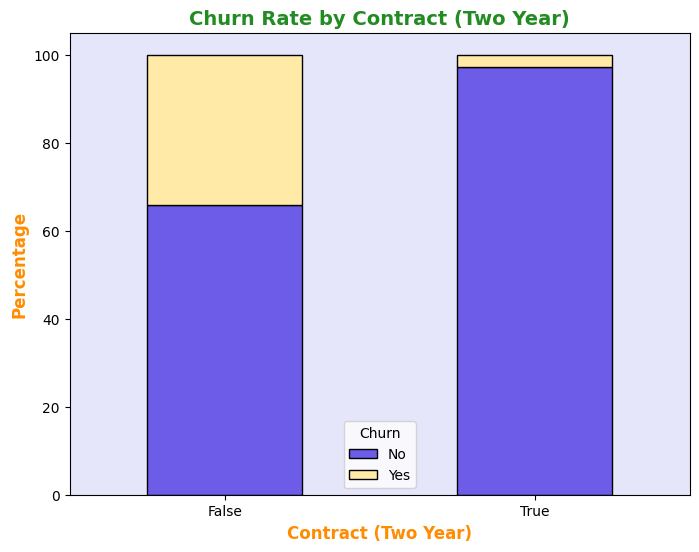

In [ ]:
# 3.6 (continued). Churn by Contract (Two Year)
contract_churn = df.groupby('Contract_Two year')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by Contract (Two year):")
print(contract_churn)

contract_churn.plot(kind='bar', stacked=True, figsize=(8, 6), edgecolor='black', color=['#6c5ce7', '#ffeaa7'])
plt.title('Churn Rate by Contract (Two Year)', fontsize=14, fontweight='bold', color='forestgreen')
plt.xlabel('Contract (Two Year)', fontsize=12, fontweight='bold', color='darkorange')
plt.ylabel('Percentage', fontsize=12, fontweight='bold', color='darkorange')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.gca().set_facecolor('#e6e6fa')
plt.show()


## **3.7. Churn by Payment Method (All Variants)**

- Shows the churn rate based on different payment methods (automatic credit card, Electronic check, and Mailed check) (using stacked bar charts). Identifies potential links between payment preferences and churn.


### **Variant 1: Automatic Credit Card**


Churn Rate by PaymentMethod (Credit card (automatic)):
Churn                                          0          1
PaymentMethod_Credit card (automatic)                      
False                                  70.344203  29.655797
True                                   84.756899  15.243101


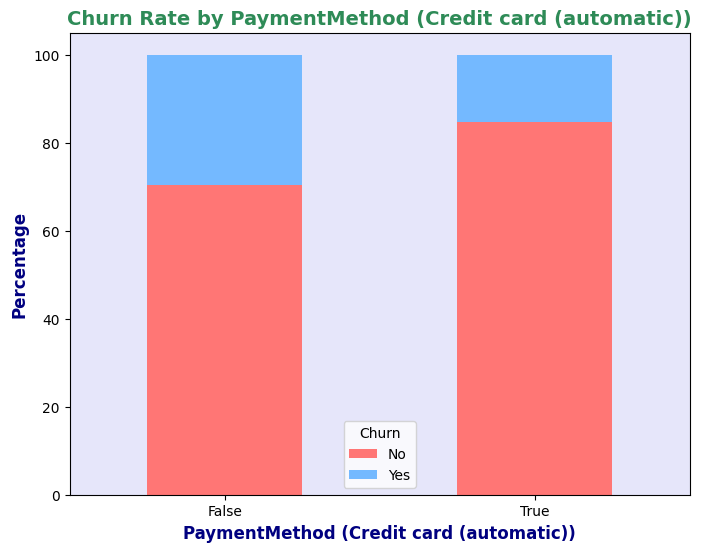

In [ ]:
# 3.7. Churn by Payment Method (All Variants)
# Variant 1
payment_churn = df.groupby('PaymentMethod_Credit card (automatic)')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by PaymentMethod (Credit card (automatic)):")
print(payment_churn)

payment_churn.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#ff7675', '#74b9ff'])
plt.title('Churn Rate by PaymentMethod (Credit card (automatic))', fontsize=14, fontweight='bold', color='seagreen')
plt.xlabel('PaymentMethod (Credit card (automatic))', fontsize=12, fontweight='bold', color='navy')
plt.ylabel('Percentage', fontsize=12, fontweight='bold', color='navy')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.gca().set_facecolor('#e6e6fa')
plt.show()

### **Variant 2: Electronic Check**


Churn Rate by PaymentMethod (Electronic check):
Churn                                   0          1
PaymentMethod_Electronic check                      
False                           82.937781  17.062219
True                            54.714588  45.285412


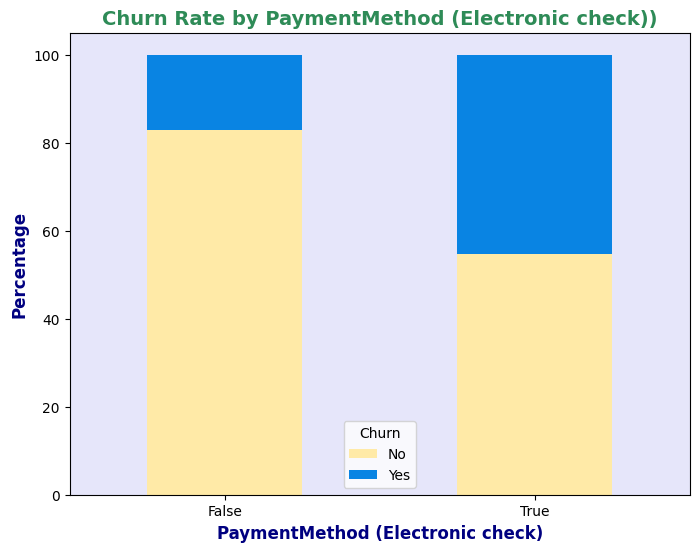

In [ ]:
# Variant 2
payment_churn = df.groupby('PaymentMethod_Electronic check')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by PaymentMethod (Electronic check):")
print(payment_churn)

payment_churn.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#ffeaa7', '#0984e3'])
plt.title('Churn Rate by PaymentMethod (Electronic check)', fontsize=14, fontweight='bold', color='seagreen')
plt.xlabel('PaymentMethod (Electronic check)', fontsize=12, fontweight='bold', color='navy')
plt.ylabel('Percentage', fontsize=12, fontweight='bold', color='navy')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.gca().set_facecolor('#e6e6fa')
plt.show()


### **Variant 3: Mailed Check**


Churn Rate by PaymentMethod (Mailed check):
Churn                               0          1
PaymentMethod_Mailed check                      
False                       71.252302  28.747698
True                        80.893300  19.106700


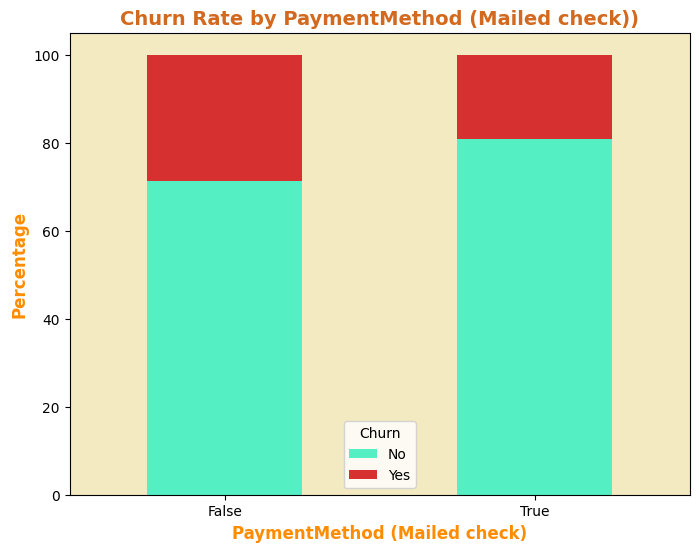

In [ ]:
# Variant 3
payment_churn = df.groupby('PaymentMethod_Mailed check')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by PaymentMethod (Mailed check):")
print(payment_churn)

payment_churn.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#55efc4', '#d63031'])
plt.title('Churn Rate by PaymentMethod (Mailed check)', fontsize=14, fontweight='bold', color='chocolate')
plt.xlabel('PaymentMethod (Mailed check)', fontsize=12, fontweight='bold', color='darkorange')
plt.ylabel('Percentage', fontsize=12, fontweight='bold', color='darkorange')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.gca().set_facecolor('#f3eac2')
plt.show()

## **3.8. Tenure Distribution:**
- Shows how these numerical features are distributed across all customers (using density plots).Provides insights into customer behavior and spending patterns.

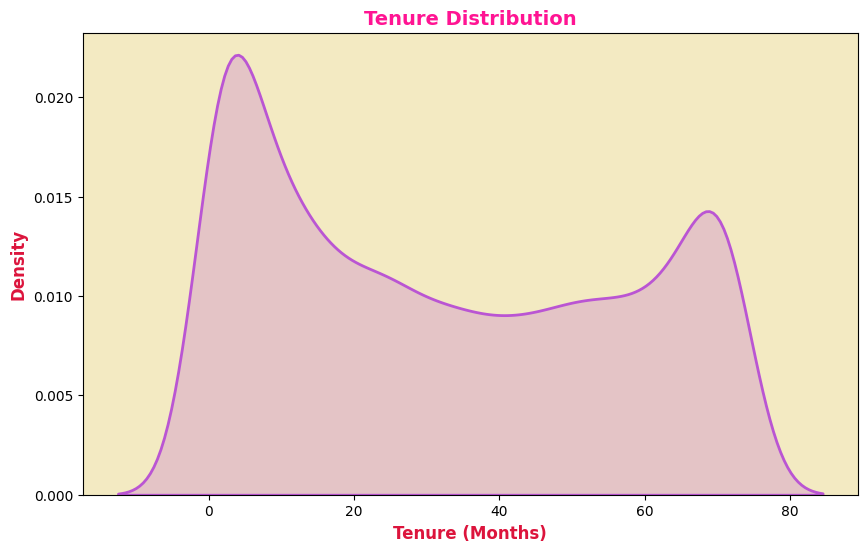

In [ ]:
# 3.8. Tenure Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='tenure', fill=True, color='mediumorchid', linewidth=2)
plt.title('Tenure Distribution', fontsize=14, fontweight='bold', color='deeppink')
plt.xlabel('Tenure (Months)', fontsize=12, fontweight='bold', color='crimson')
plt.ylabel('Density', fontsize=12, fontweight='bold', color='crimson')
plt.gca().set_facecolor('#f3eac2')
plt.show()

## **3.9. Monthly Charges Distribution:**
-  Shows how these numerical features are distributed across all customers (using density plots).Provides insights into customer behavior and spending patterns.

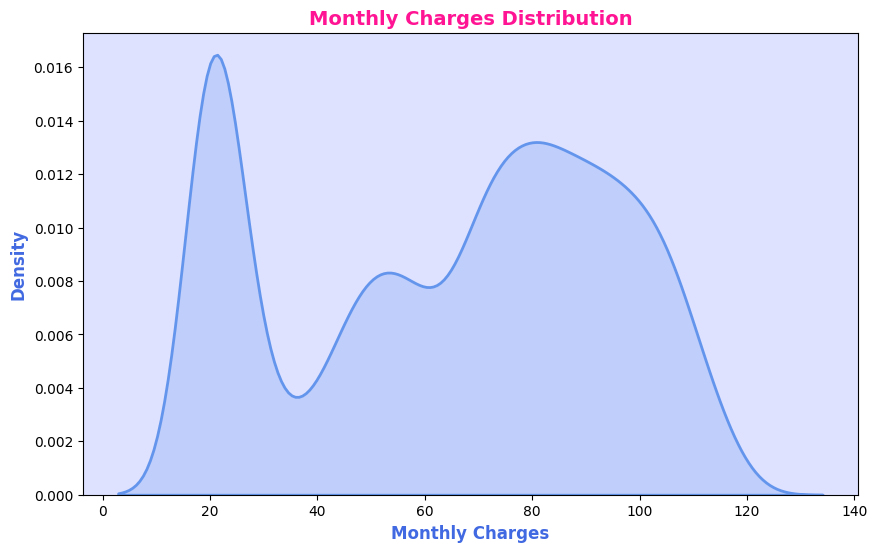

In [ ]:
# 3.9. Monthly Charges Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyCharges', fill=True, color='cornflowerblue', linewidth=2)
plt.title('Monthly Charges Distribution', fontsize=14, fontweight='bold', color='deeppink')
plt.xlabel('Monthly Charges', fontsize=12, fontweight='bold', color='royalblue')
plt.ylabel('Density', fontsize=12, fontweight='bold', color='royalblue')
plt.gca().set_facecolor('#dee2ff')
plt.show()

## **3.10. Total Charges Distribution:**
- Shows how these numerical features are distributed across all customers (using density plots).Provides insights into customer behavior and spending patterns.

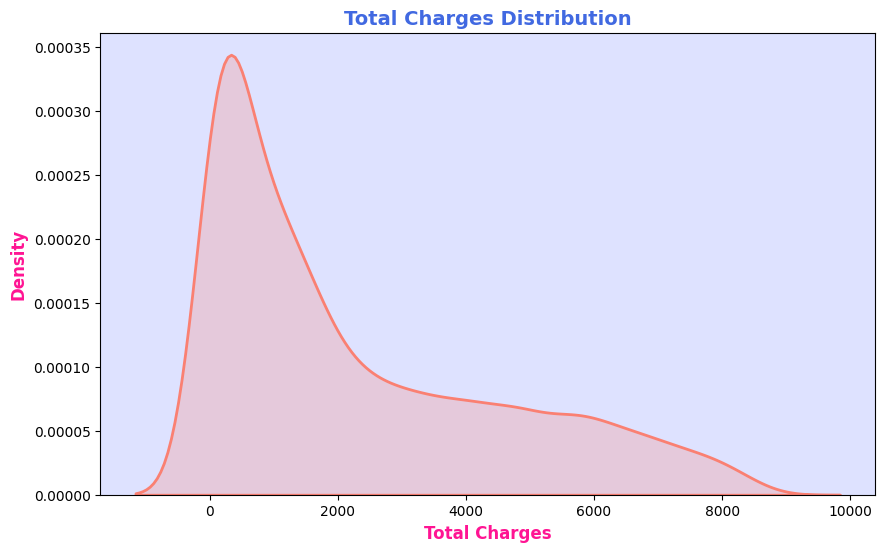

In [ ]:
# 3.10. Total Charges Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='TotalCharges', fill=True, color='salmon', linewidth=2)
plt.title('Total Charges Distribution', fontsize=14, fontweight='bold', color='royalblue')
plt.xlabel('Total Charges', fontsize=12, fontweight='bold', color='deeppink')
plt.ylabel('Density', fontsize=12, fontweight='bold', color='deeppink')
plt.gca().set_facecolor('#dee2ff')
plt.show()


## **3.11. Correlation Heatmap:**
- Display the correlation between each numerical features with each other using heatmap. Detect potential multicollinearity and feature dependencies.

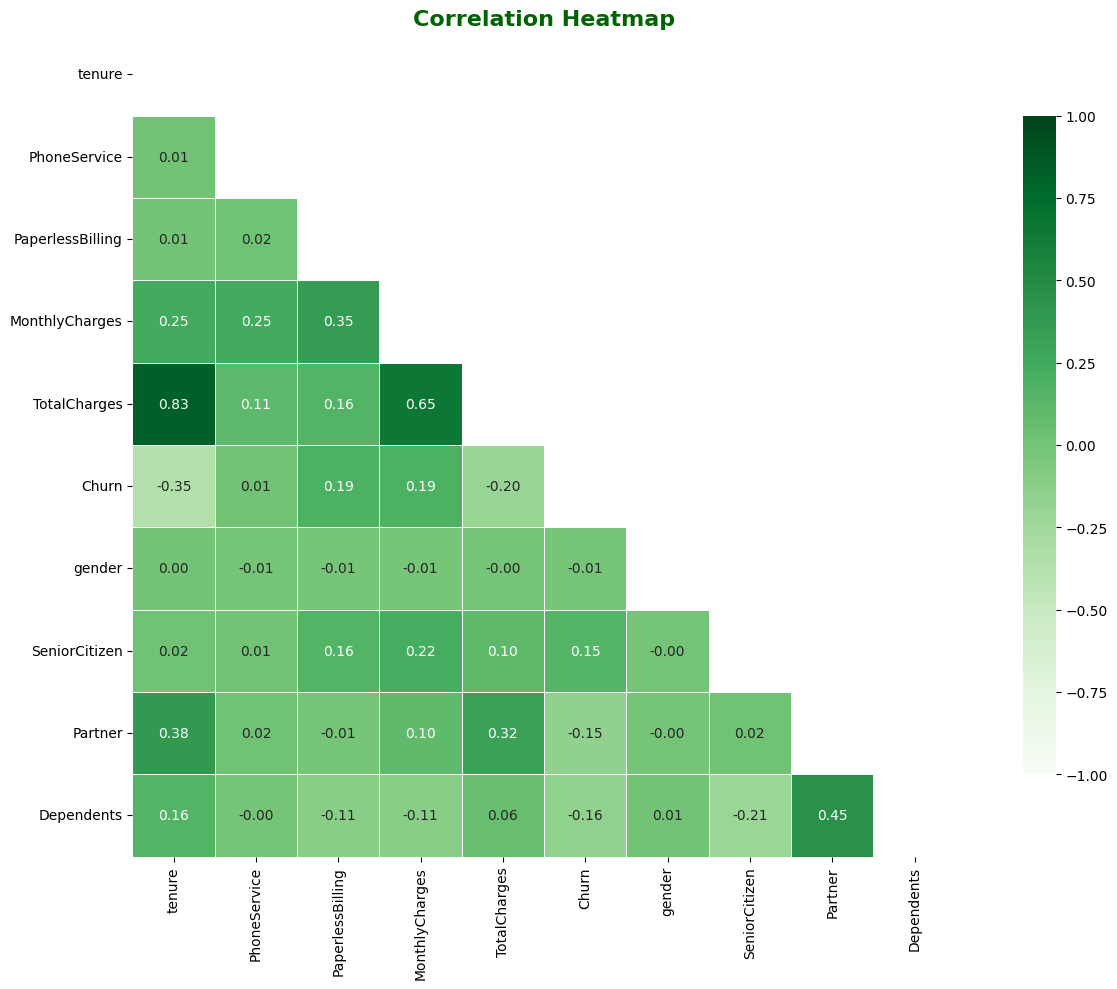

In [ ]:
# 3.11. Compute correlation matrix on numeric columns
corr = df.select_dtypes(include=np.number).corr()

# Create mask for upper triangle to simplify the plot
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='Greens',               # Light green color map
    annot=True,                  # Show values in cells
    fmt=".2f",                   # Format to 2 decimal places
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"shrink": 0.8},
    vmin=-1, vmax=1,
    square=True
)

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', color='darkgreen')
plt.tight_layout()
plt.show()


In [ ]:
# Top Correlations Summary
corr_unstacked = corr.abs().unstack().sort_values(ascending=False)
top_corr = corr_unstacked[(corr_unstacked < 1.0)].drop_duplicates().head(10)
print("Top correlated feature pairs:\n", top_corr)


Top correlated feature pairs:
 tenure          TotalCharges        0.826135
TotalCharges    MonthlyCharges      0.651058
Partner         Dependents          0.452630
tenure          Partner             0.379961
Churn           tenure              0.352168
MonthlyCharges  PaperlessBilling    0.352053
Partner         TotalCharges        0.317893
tenure          MonthlyCharges      0.247701
PhoneService    MonthlyCharges      0.247369
MonthlyCharges  SeniorCitizen       0.220290
dtype: float64


# **4. 📐Feature Engineering**
- This step involves creating new features from the existing ones to improve model performance.
- creating a `tenure group` column based on customer tenure (how long they've been a customer). This groups customers into tenure ranges (e.g., 0-12 months, 12-24 months, etc.).
- Then the `tenure group` converted into numerical type using one hot encoding method

In [ ]:
# Feature Engineering
# (Combining features, creating new ones, or transforming existing ones)

# Create a tenure group feature
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 Months'
    elif 12 < tenure <= 24:
        return '12-24 Months'
    elif 24 < tenure <= 48:
        return '24-48 Months'
    elif 48 < tenure <= 60:
        return '48-60 Months'
    else:
        return '60+ Months'

df['tenure_group'] = df['tenure'].apply(tenure_group)
df = pd.get_dummies(df, columns=['tenure_group'], drop_first=True)


# **5. 🔀 Split the Data**
- The data is split into two sets: a training set and a testing set.
- The training set is used to teach the model how to make predictions.
- The testing set is used to evaluate how well the model learned.
- Splitting the data ensures that the model is evaluated on unseen data, providing a more realistic assessment of its performance.

In [ ]:
# Split the Data
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Scale the Data**
- The numerical features are scaled using a StandardScaler. This ensures that all features have a similar range of values, preventing features with larger values from dominating the model.
- Scaling can improve the performance and convergence of machine learning models.

In [ ]:
# Scale the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## **Handle Class Imbalance**
- If the churn rate is very uneven (e.g., only a small percentage of customers churn), the model might be biased towards predicting "no churn."
- SMOTE (Synthetic Minority Oversampling Technique) is used to create synthetic data points for the minority class (churned customers) to balance the dataset.

In [ ]:
# Handle Class Imbalance
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# **6. 🤖 Choose a Model**
- Three different machine learning models are selected: Logistic Regression, Random Forest, and Gradient Boosting. These are common choices for classification problems.


# **7. 🏋️ Train the Model**
- Each of the selected models is trained on the training data. This means the model learns the relationship between the features and the target variable (churn).

In [ ]:
# Train the Model
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)


LogisticRegression(random_state=42)

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [ ]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)



GradientBoostingClassifier(random_state=42)

# **8. 📈 Evaluate the Model**
- The trained models are evaluated on the testing data.
- Metrics like accuracy, precision, recall, F1-score, and AUC-ROC are calculated to assess the model's performance.
- A confusion matrix is generated to visualize the model's performance in terms of true positives, true negatives, false positives, and false negatives.
- ROC curves are plotted to visualize the trade-off between the true positive rate and the false positive rate.
- Classification reports are generated to provide a detailed summary of the model's performance.


In [ ]:
# Evaluate the Model
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix',fontsize = 14, fontweight = 'bold', color = 'darkmagenta')
    plt.xlabel('Predicted Label',fontsize = 12, fontweight = 'bold', color = 'seagreen')
    plt.ylabel('True Label',fontsize = 12, fontweight = 'bold', color = 'seagreen')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',fontsize = 12, fontweight = 'bold', color = 'teal')
    plt.ylabel('True Positive Rate',fontsize = 12, fontweight = 'bold', color = 'teal')
    plt.title(f'{model_name} - ROC Curve',fontsize = 14, fontweight = 'bold', color = 'firebrick')
    plt.legend(loc="lower right")
    plt.gca().set_facecolor('#f2f2f2')
    plt.show()

    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")



--- Logistic Regression Evaluation ---
Accuracy: 0.7935
Precision: 0.6781
Recall: 0.4225
F1-Score: 0.5206
AUC-ROC: 0.8335


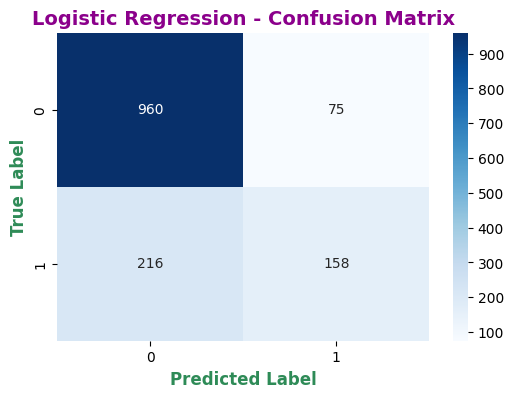

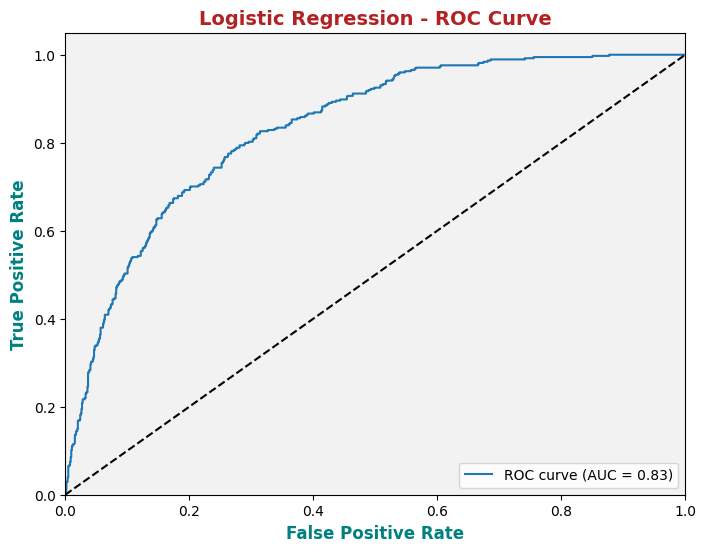

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1035
           1       0.68      0.42      0.52       374

    accuracy                           0.79      1409
   macro avg       0.75      0.67      0.69      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
# Evaluate Logistic Regression
evaluate_model(logreg, X_test, y_test, "Logistic Regression")

--- Random Forest Evaluation ---
Accuracy: 0.7942
Precision: 0.6296
Recall: 0.5455
F1-Score: 0.5845
AUC-ROC: 0.8390


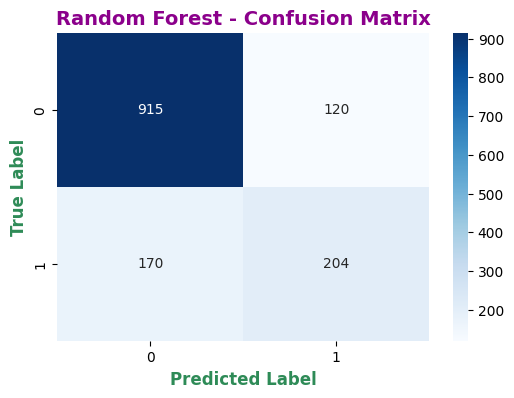

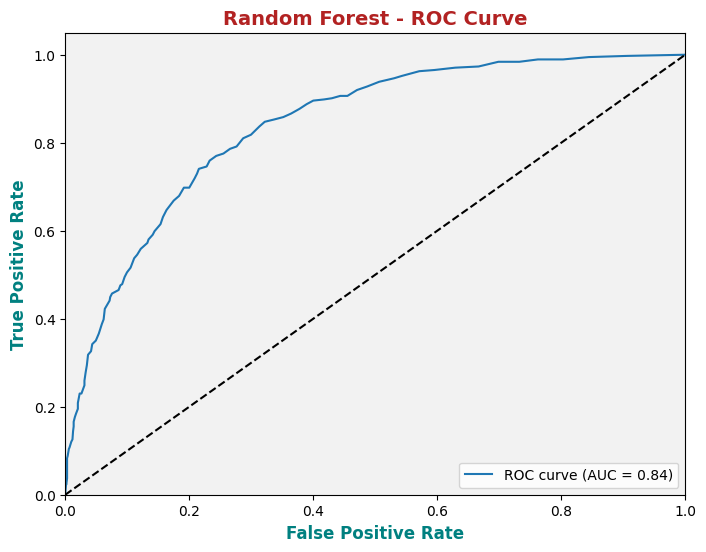

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.63      0.55      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [ ]:
# Evaluate Random Forest
evaluate_model(rf_model, X_test, y_test, "Random Forest")

--- Gradient Boosting Evaluation ---
Accuracy: 0.7750
Precision: 0.5610
Recall: 0.7005
F1-Score: 0.6231
AUC-ROC: 0.8441


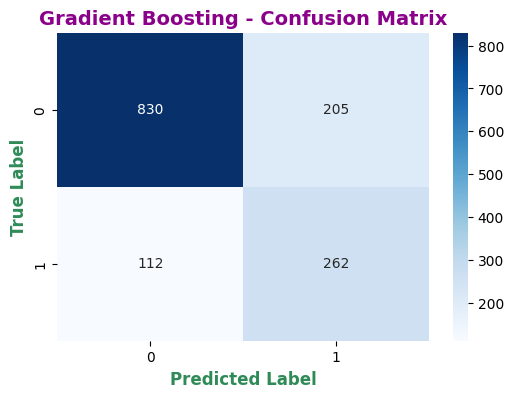

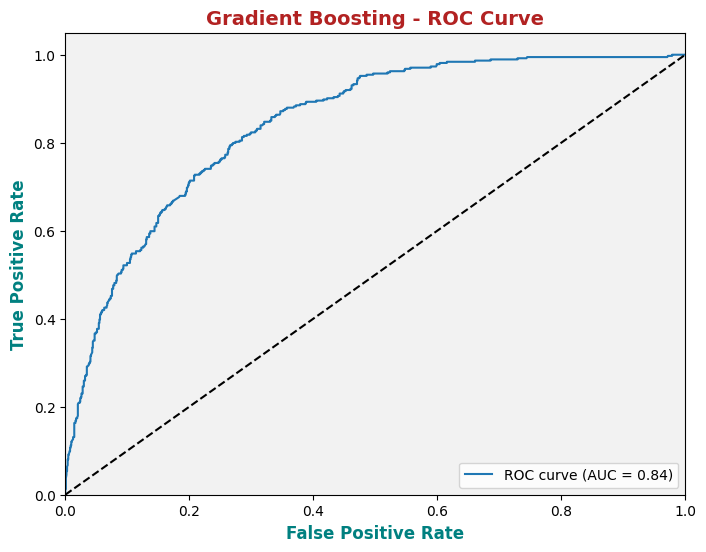

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.70      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409



In [ ]:
# Evaluate Gradient Boosting
evaluate_model(gb_model, X_test, y_test, "Gradient Boosting")


# **9. 🔧 Improve the Model**
- Hyperparameter tuning is performed using GridSearchCV to find the best combination of hyperparameters for the Logistic Regression model.
- Hyperparameters are parameters that are not learned from the data but are set prior to training.
- GridSearchCV systematically searches through a predefined grid of hyperparameter values and selects the combination that results in the best performance.



Best parameters found by GridSearchCV:
{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
--- Best Logistic Regression (Tuned) Evaluation ---
Accuracy: 0.7935
Precision: 0.6878
Recall: 0.4064
F1-Score: 0.5109
AUC-ROC: 0.8354


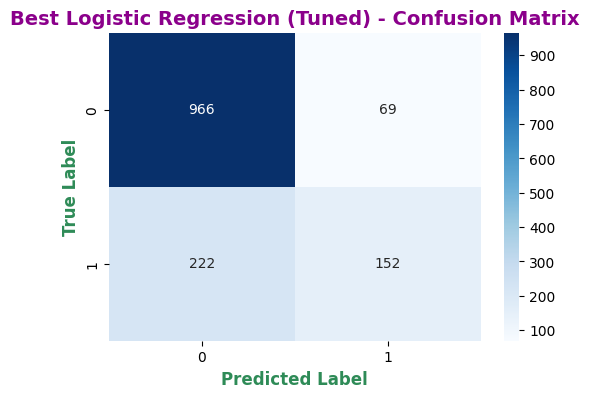

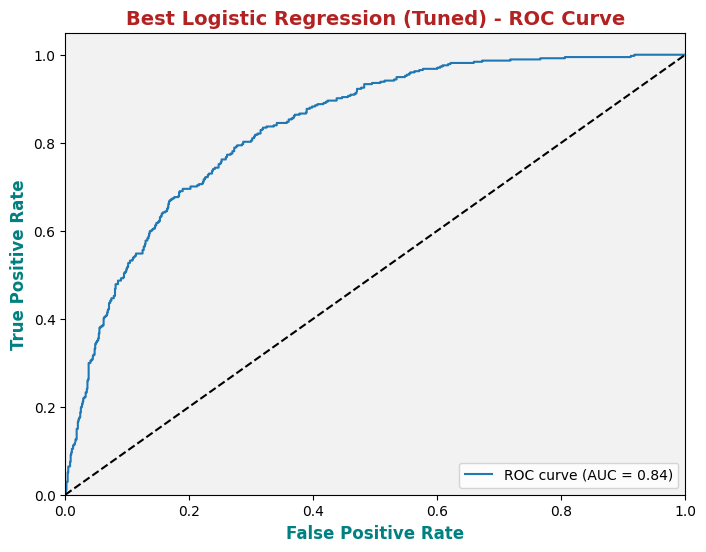

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1035
           1       0.69      0.41      0.51       374

    accuracy                           0.79      1409
   macro avg       0.75      0.67      0.69      1409
weighted avg       0.78      0.79      0.77      1409



In [ ]:
# Improve the Model
# Hyperparameter Tuning using GridSearchCV (example with Logistic Regression)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']  # 'liblinear' is suitable for small datasets
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train_resampled, y_train_resampled)

print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

best_logreg = grid_search.best_estimator_

# Evaluate the best Logistic Regression model
evaluate_model(best_logreg, X_test, y_test, "Best Logistic Regression (Tuned)")


# **10. 🚀 Deploy the Model (optional)**
- This step involves putting the trained model into a real-world application where it can be used to make predictions on new data.
- This might involve creating an API, deploying to a cloud platform, or embedding the model in a software application.
- The code includes an example of how to save the trained model and scaler to files, which can then be loaded and used in a separate application.

In [ ]:
# Deploy the Model (optional)
# This part depends on the specific deployment environment (e.g., creating an API using Flask, deploying to a cloud platform, etc.).

# Example: Saving the model and scaler
# import joblib
# joblib.dump(best_logreg, 'churn_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')

# **Conclusion:**
- The customer churn prediction models achieved reasonable accuracy, with Gradient Boosting showing the highest AUC-ROC score (0.8441), suggesting a better ability to distinguish between churners and non-churners. However, there's room for improvement, particularly in Precision and Recall.


# **Recommendation:**
- Focus on further refining the Gradient Boosting model. Experiment with more advanced feature engineering techniques (e.g., interaction terms, polynomial features) and explore different hyperparameter tuning strategies to improve the balance between precision and recall and further boost model performance.
